# Preventing Customer Churn, Identifying Hidden Segments and Improving Satisfaction of Pharmaceutical Drug Users

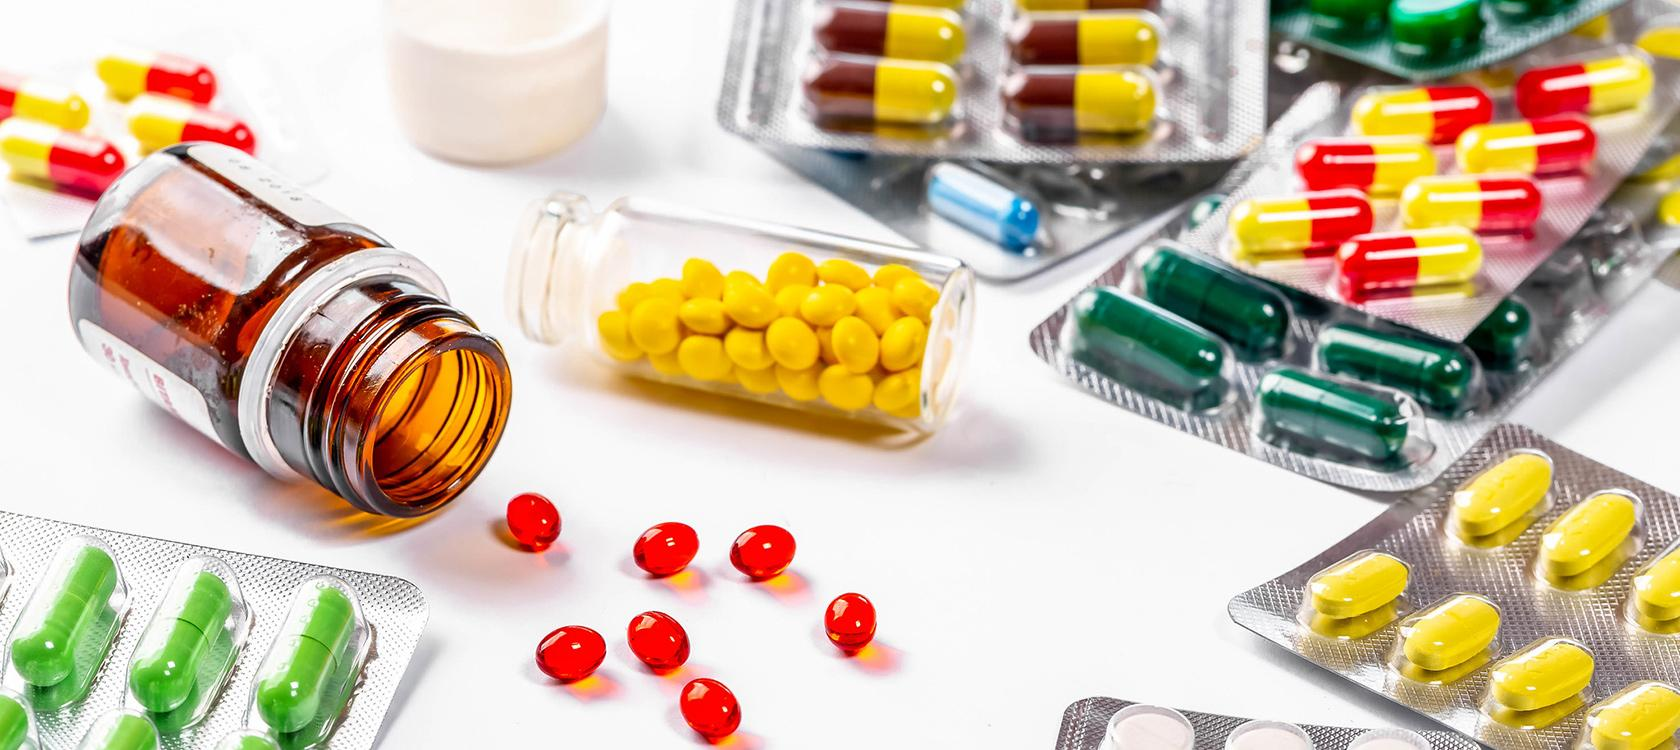

## Executive Summary
This notebook builds two recommender system for Pharmaceutical Drug Users. One is for existing customer who is looking for alternative medicine and another for first time customer based on condition. Finally, in this notebook I will conclude and provide recommendations to Pharmaceutical companies.        

### Contents:
- [1. Importing the Libraries](#1.-Importing-the-Libraries)
- [2. Recommending Based on Medicine](#2.-Recommending-Based-on-Medicine)
- [3. Recommending Based on Condition](#3.-Recommending-Based-on-Condition)
- [4. Conclusion and Recommendation](#4.-Conclusion-and-Recommendation)

## 1. Importing the Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
df_train = pd.read_csv('../datasets/drugsComTrain_raw.tsv', sep='\t')

## 2. Recommending Based on Medicine

In [3]:
df_train_rec = df_train[['drugName', 'condition', 'rating']]

In [4]:
df_train_rec.dropna(inplace=True)

<ipython-input-4-18a0c5d11751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_rec.dropna(inplace=True)


In [5]:
df_train_rec.head()

,drugName,condition,rating
0,Valsartan,Left Ventricular Dysfunction,9.0
1,Guanfacine,ADHD,8.0
2,Lybrel,Birth Control,5.0
3,Ortho Evra,Birth Control,8.0
4,Buprenorphine / naloxone,Opiate Dependence,9.0


In [6]:
pivot = pd.pivot_table(df_train_rec, index='drugName', columns='condition', values='rating')

In [7]:
sum(pivot.isnull().sum())/(pivot.shape[0]*pivot.shape[1])

0.9972007949874118

In [8]:
sparse_pivot = sparse.csr_matrix(pivot.fillna(0))
print(sparse_pivot)

  (0, 153)	10.0
  (1, 588)	10.0
  (2, 355)	8.211538461538462
  (3, 355)	9.0
  (4, 455)	7.0
  (4, 701)	7.176470588235294
  (5, 37)	7.0
  (5, 90)	6.238095238095238
  (5, 144)	7.1875
  (5, 164)	6.173333333333333
  (5, 172)	8.75
  (5, 262)	6.591549295774648
  (5, 487)	6.555555555555555
  (5, 564)	6.888888888888889
  (5, 639)	8.0
  (5, 712)	7.689655172413793
  (5, 713)	6.361111111111111
  (5, 796)	9.0
  (6, 164)	8.0
  (6, 639)	8.0
  (7, 713)	7.75
  (8, 669)	9.11111111111111
  (9, 205)	8.0
  (9, 848)	5.0
  (10, 176)	9.666666666666666
  :	:
  (3419, 712)	6.4
  (3419, 713)	6.5625
  (3420, 91)	8.0
  (3421, 164)	8.0
  (3421, 172)	1.0
  (3421, 712)	6.333333333333333
  (3421, 713)	5.333333333333333
  (3422, 18)	10.0
  (3422, 63)	10.0
  (3422, 72)	10.0
  (3422, 95)	7.075
  (3422, 820)	7.846153846153846
  (3423, 95)	9.0
  (3424, 95)	10.0
  (3425, 669)	9.714285714285714
  (3426, 152)	10.0
  (3426, 503)	9.11111111111111
  (3426, 634)	10.0
  (3426, 737)	8.5
  (3427, 441)	2.5
  (3428, 165)	1.0
  (3429, 

In [9]:
recommender = pairwise_distances(sparse_pivot, metric='cosine')

In [10]:
recommender_df = pd.DataFrame(recommender, columns=pivot.index, index=pivot.index)
recommender_df.head()

drugName,A + D Cracked Skin Relief,A / B Otic,Abacavir / dolutegravir / lamivudine,Abacavir / lamivudine / zidovudine,Abatacept,Abilify,Abilify Discmelt,Abilify Maintena,Abiraterone,AbobotulinumtoxinA,...,Zyprexa Zydis,Zyrtec,Zyrtec-D,Zyrtec-D 12 Hour,Zytiga,Zyvox,ZzzQuil,depo-subQ provera 104,ella,femhrt
drugName,,,,,,,,,,,,,,,,,,,,,
A + D Cracked Skin Relief,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A / B Otic,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Abacavir / dolutegravir / lamivudine,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Abacavir / lamivudine / zidovudine,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Abatacept,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
search = 'AbobotulinumtoxinA'

for drugName in df_train_rec.loc[df_train_rec['drugName'].str.contains(search), 'drugName']:
    print(drugName)
    print('Average rating', pivot.loc[drugName, :].mean())
    print('Number of ratings', pivot.T[drugName].count())
    print('')
    print('10 closest drugs')
    print(recommender_df[drugName].sort_values()[1:11])
    print('')
    print('*******************************************************************************************')
    print('')

AbobotulinumtoxinA
Average rating 6.5
Number of ratings 2

10 closest drugs
drugName
Dysport                   0.018866
IncobotulinumtoxinA       0.152002
Juvederm Voluma XC        0.470001
Botox Cosmetic            0.470001
Botox                     0.564689
OnabotulinumtoxinA        0.621743
Botulinum toxin type b    0.652011
Lioresal                  0.670278
Tazarotene                0.685495
Dermal filler             0.693433
Name: AbobotulinumtoxinA, dtype: float64

*******************************************************************************************

AbobotulinumtoxinA
Average rating 6.5
Number of ratings 2

10 closest drugs
drugName
Dysport                   0.018866
IncobotulinumtoxinA       0.152002
Juvederm Voluma XC        0.470001
Botox Cosmetic            0.470001
Botox                     0.564689
OnabotulinumtoxinA        0.621743
Botulinum toxin type b    0.652011
Lioresal                  0.670278
Tazarotene                0.685495
Dermal filler             0.69

## 3. Recommending Based on Condition

In [12]:
help_dict = {}

# Iterate over conditions
for i in df_train.condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_train[df_train.condition == i].drugName.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_train.drugName == j) >= 10:
            temp_ls.append((j, np.sum(df_train[df_train.drugName == j].rating) / np.sum(df_train.drugName == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [13]:
help_dict['Birth Control'].iloc[:10]

,drug,average_rating
0,Plan B,8.674917
1,Lybrel,7.600000
2,Ortho Evra,7.470320
3,Kyleena,7.463576
4,Levonorgestrel,7.391031
5,Ortho-Cept,7.250000
6,Skyla,7.246359
7,Copper,7.235197
8,Beyaz,7.042553
9,Dienogest / estradiol,6.875000


In [17]:
help_dict['Obesity'].iloc[:10]

,drug,average_rating
0,Desoxyn,9.588235
1,Diethylpropion,9.305882
2,Tenuate,9.250000
3,Adipex-P,9.042945
4,Phentermine,8.786131
5,Methamphetamine,8.625000
6,Xenical,8.539683
7,Phendimetrazine,8.347826
8,Meridia,8.209302
9,Victoza,8.075581


In [14]:
help_dict['Depression'].iloc[:10]

,drug,average_rating
0,Desipramine,9.285714
1,Xanax XR,8.947368
2,Alprazolam,8.933144
3,Xanax,8.881579
4,Parnate,8.763158
5,St. john's wort,8.739130
6,Nefazodone,8.727273
7,Methylin ER,8.700000
8,Clomipramine,8.680000
9,Phenelzine,8.666667


In [15]:
help_dict['Pain'].iloc[:10]

,drug,average_rating
0,Ketoprofen,9.533333
1,Dolophine,9.307692
2,Methadone Diskets,9.304348
3,Proctofoam,9.294118
4,Vicodin ES,9.272727
5,Acetaminophen / phenyltoloxamine,9.272727
6,Demerol,9.225000
7,Meperidine,9.106383
8,Roxicodone,9.000000
9,Cataflam,9.000000


### Comment
Based on patient condition, pharmacies can use the average rating as a reference for prescription.

## 4. Conclusion and Recommendation

### Product/Service
1) Companies should focus on developing drugs for birth control, weight loss, depression, anxiety and pain. Based on cluster analysis and topic modelling. Three clusters were identified, the first segement mostly suffer from condition such as birth control, obesity and acne. This segement is highly image conscious, they are concerned about whether the drug will make them gain weight. Therefore, companies should take note to reduce the effect of weight gain when developing drugs. The second cluster are those with mental illness, such as depression and anxiety. The third cluster are those dealing with pain. Besides that, based on exploratory data analysis, the most frequent conditions are birth control, depression, pain, anxiety, acne, bipolar disorder, insomnia, weight loss, obesity and ADHD. It is therefore recommended for companies to focus on drugs in these areas to maximise customer base and increase profit. 

2) Companies should quickly conduct customer recovery service when a negative sentiment was detected. Companies can use the random forest classification model developed to classify customers into positive or nagative. Prescence of words such worse, disappointed, would't recommend, ruined or worst are strong indicators of nagative customers. Companies can quickly contact these customers to understand more about their experience and use the recommender system developed to recommend alternative medicine to them. Based on the customer feedback, companies and conduct more R&D to improve on the drug. Such a way, customer churn could be avoided and valuable information were gathered for drug improvement. 
  
### Promotion
1) Different marketing strategies should be developed for different segments. When targeting the image conscious segment, the message should be along the line to better apperance, not gaining weight or better skin. When targeting the mental well-being segment, the message should be better mood, mental positivity and good energy because this is what concerned this segment the most. When targeting the pain killer segement, the message should be along the line, disappearing pain. 

2) The marketing message should include words such as love, amazing, miracle or changed life. These words are generally associated with positive sentiment and what most drug users yearn for. 